In [1]:
import altair as alt
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\hoek.HKV\Downloads\test (1).csv", index_col=0)

In [3]:
df.head()

,Parameter,Locatie,Expected files,Valid files,Week
0,STB,FL65,1.0,1.0,2019-W22
1,STB,FL65,1.0,1.0,2019-W23
2,STB,FL65,1.0,1.0,2019-W24
3,STB,FL65,1.0,1.0,2019-W26
4,STB,FL65,1.0,1.0,2019-W27


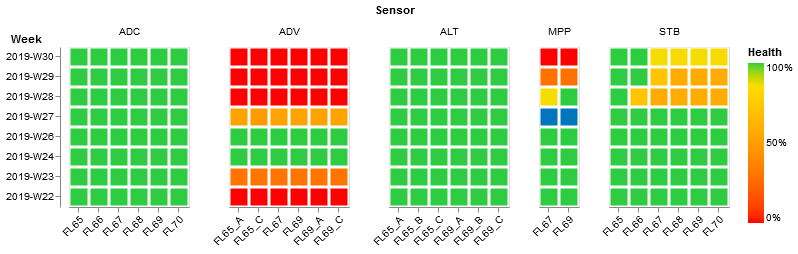

In [43]:
single_nearest = alt.selection_single(on='mouseover', empty='none')
alt.Chart(df).mark_rect(strokeWidth=1.).encode(
    y=alt.Y('Week:N', sort='descending'),
    x=alt.X('Locatie:N', title=None),
    fill=alt.Fill(
        'Expected files:Q',
        scale=alt.Scale(
            domain=[0,.85,1.00],
            range=['red','#FFDC00','#2ECC40']
        ),
        legend=alt.Legend(values=[0,0.50,1], title='Health', format='.0%')        
    ),
    stroke=alt.condition(single_nearest,alt.StrokeValue('black'), alt.StrokeValue('white')),
    tooltip=['Locatie:N',
             'Parameter:N', 
             'Week:N', 
             alt.Tooltip('Expected files:Q', format='.0%'), 
             alt.Tooltip('Valid files:Q', format='.0%')],   
    facet=alt.Facet('Parameter:N', title='Sensor')
).resolve_scale(
    x='independent'
).configure_scale(
    bandPaddingInner=0.1,
    bandPaddingOuter=0.05
).configure_axisX(
    labelAngle=-45
).configure_axisY(
    titleAngle=0,
    titleAlign="left",
    titleY=-3,
    titleX=-50,
).add_selection(
    single_nearest
)